# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [4]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [3]:
#!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  36.0M      0 --:--:--  0:00:24 --:--:-- 17.0M


In [5]:
#!gunzip SUSY.csv.gz

In [6]:
filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)
df.head(10)

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
5,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044
6,0.0,0.437818,-1.119883,-1.336823,0.502320,-1.717515,1.017067,0.215619,-0.461200,0.323671,0.173626,0.411898,0.370525,0.798260,0.671369,0.385910,0.515522,0.479110,0.029058
7,0.0,0.571656,0.205696,0.425950,0.578514,0.927399,-1.101478,0.116555,1.549753,0.174421,0.223450,0.523164,0.289889,0.491710,0.334593,0.514246,0.268207,0.315795,0.125728
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
9,0.0,1.001869,-0.471788,0.555614,1.233368,1.255548,-1.052491,0.437615,-1.333052,0.326858,-0.111678,1.435708,0.755201,0.466779,0.454541,1.446331,0.592259,1.325197,0.083014


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [7]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [8]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get an unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [9]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follows:

In [10]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

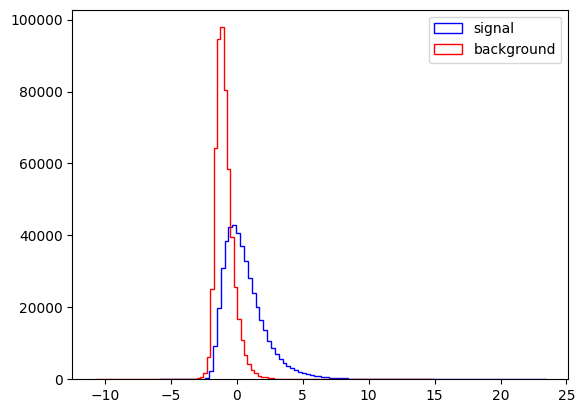

In [11]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

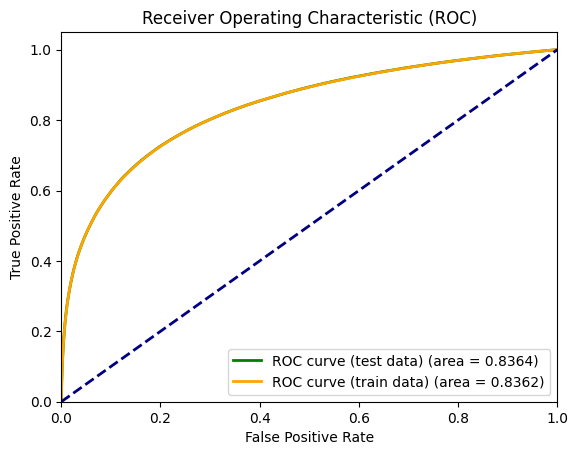

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Fisher.fit(X_Train, y_Train)                                                    # training classifier

test_decision_scores = Fisher.decision_function(X_Test)                         # Test data: score

fpr_test, tpr_test, _ = roc_curve(y_Test, test_decision_scores)                 # Test data: ROC curve and ROC area
roc_auc_test = auc(fpr_test, tpr_test)

train_decision_scores = Fisher.decision_function(X_Train)                       # training data: score

fpr_train, tpr_train, _ = roc_curve(y_Train, train_decision_scores)             # training data: ROC curve and ROC area
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()                                                                    # Plot ROC curves
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test data) (area = %0.4f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label='ROC curve (train data) (area = %0.4f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance on a single plot.

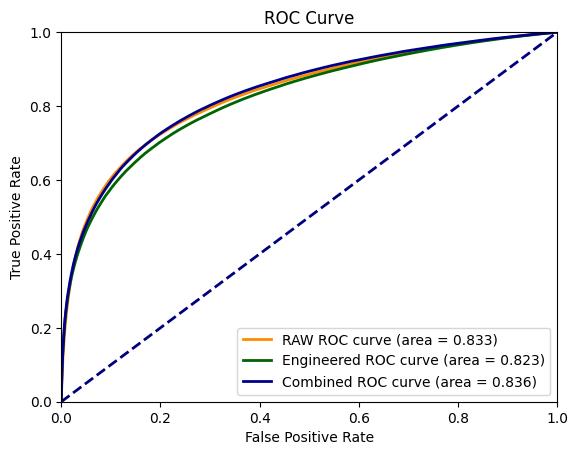

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

raw_features = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"] # raws and engineered columns for simplicity
engineered_features = ['dPhi_r_b', 'MT2', 'S_R', 'cos_theta_r1', 'M_TR_2', 'R', 'MET_rel', 'M_R', 'M_Delta_R', 'axial_MET']
combined_features = raw_features + engineered_features

# Train classifiers
Fisher_raw = LDA()
Fisher_engineered = LDA()
Fisher_combined = LDA()

Fisher_raw.fit(Train_Sample[raw_features], y_Train)
Fisher_engineered.fit(Train_Sample[engineered_features], y_Train)
Fisher_combined.fit(Train_Sample[combined_features], y_Train)

# Compute decision function scores for test data
test_decision_scores_raw = Fisher_raw.decision_function(Test_Sample[raw_features])
test_decision_scores_engineered = Fisher_engineered.decision_function(Test_Sample[engineered_features])
test_decision_scores_combined = Fisher_combined.decision_function(Test_Sample[combined_features])

# Compute ROC curves and AUC values for each classifier
fpr_raw, tpr_raw, _ = roc_curve(y_Test, test_decision_scores_raw)
roc_auc_raw = auc(fpr_raw, tpr_raw)

fpr_engineered, tpr_engineered, _ = roc_curve(y_Test, test_decision_scores_engineered)
roc_auc_engineered = auc(fpr_engineered, tpr_engineered)

fpr_combined, tpr_combined, _ = roc_curve(y_Test, test_decision_scores_combined)
roc_auc_combined = auc(fpr_combined, tpr_combined)

# Plot ROC curves
plt.figure()
plt.plot(fpr_raw, tpr_raw, color='darkorange', lw=2, label='RAW ROC curve (area = %0.3f)' % roc_auc_raw)
plt.plot(fpr_engineered, tpr_engineered, color='darkgreen', lw=2, label='Engineered ROC curve (area = %0.3f)' % roc_auc_engineered)
plt.plot(fpr_combined, tpr_combined, color='darkblue', lw=2, label='Combined ROC curve (area = %0.3f)' % roc_auc_combined)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.
### SVM, Stochastic Gradient Descent, Random Forest

In [14]:
## The three classifiers that I chose to use for 4.b are Support Vector Machine, Stochastic Gradiet Descent, and Random Forest.


#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

def compare_classifiers(classifiers, train_features, test_features, train_labels, test_labels):
    results = {}
    for name, clf in classifiers.items():
        clf.fit(train_features, train_labels)
        decision_scores = clf.decision_function(test_features)
        fpr, tpr, _ = roc_curve(test_labels, decision_scores)
        roc_auc = auc(fpr, tpr)
        results[name] = (fpr, tpr, roc_auc)
    return results

# Define classifiers
classifiers = {
    "SVM": SVC(probability=True),
    "Stochastic Gradient Descent": SGDClassifier(loss="log", max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Compare classifiers
results = compare_classifiers(classifiers, Train_Sample[combined_features], Test_Sample[combined_features], y_Train, y_Test)

# Plot ROC curves
plt.figure()
for name, (fpr, tpr, roc_auc) in results.items():
    plt.plot(fpr, tpr, lw=2, label='%s ROC curve (area = %0.3f)' % (name, roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 6 or 7. Signal and backgorund ratio significance.

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.
